In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
from src.tennis import TenisSimulation

In [2]:
#
n_sample = 1000
probability = 0.7

tennis_df = TenisSimulation.generate_dataset(probability, n_sample)
tennis_df.to_parquet(f'{n_sample}_probability_{probability}.parquet.gzip')

100%|██████████| 1000/1000 [00:00<00:00, 3083.37it/s]


In [3]:
tennis_df

,A scored,B scored,sets A-Wins,sets B-Wins,games A-Wins,games B-Wins,deuce,Winner
0,76,26,3,0,18,1,4,A
1,77,26,3,0,18,0,5,A
2,81,33,3,0,18,4,3,A
3,81,30,3,0,18,2,5,A
4,79,24,3,0,18,2,3,A
...,...,...,...,...,...,...,...,...
995,90,46,3,0,18,3,13,A
996,81,35,3,0,18,0,9,A
997,77,27,3,0,18,1,3,A
998,78,30,3,0,18,1,4,A


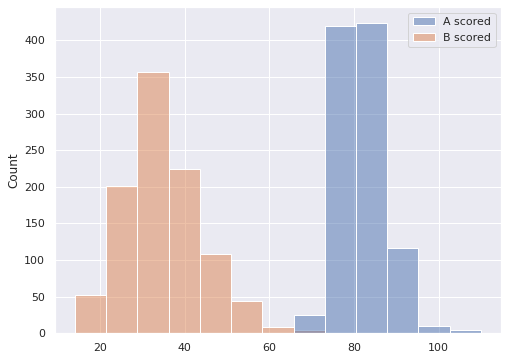

In [4]:
sns.set_theme()
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.histplot(data=tennis_df.loc[:1000, ['A scored', 'B scored']], ax=ax);

In [5]:
qtd_a_winner = []
qtd_b_winner = []

for i in range(0, n_sample//3):
    qtd_a_winner.append(sum(tennis_df.iloc[i*3:i*3+3, :]['Winner'] == 'A'))
    qtd_b_winner.append(sum(tennis_df.iloc[i*3:i*3+3, :]['Winner'] == 'B'))

qtd_a_winner = pd.DataFrame(qtd_a_winner)
qtd_b_winner = pd.DataFrame(qtd_b_winner)

In [6]:
print(f'Média de vitórias de A: {qtd_a_winner.mean().values[0]:.4f}', end=' | ')
print(f'Desvio padrão de vitórias de A: {qtd_a_winner.std().values[0]:.4f}')
print(f'Média de vitórias de B: {qtd_b_winner.mean().values[0]:.4f}', end=' | ')
print(f'Desvio padrão de vitórias de B: {qtd_b_winner.std().values[0]:.4f}')

Média de vitórias de A: 3.0000 | Desvio padrão de vitórias de A: 0.0000
Média de vitórias de B: 0.0000 | Desvio padrão de vitórias de B: 0.0000


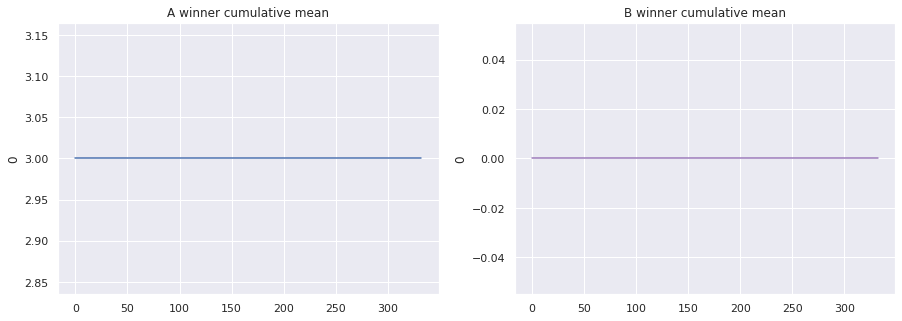

In [7]:

# Gráfico da média acumulada
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('A winner cumulative mean')
sns.lineplot(data=qtd_a_winner.expanding().mean().iloc[:, 0], ax=ax[0]);

ax[1].set_title('B winner cumulative mean')
sns.lineplot(data=qtd_b_winner.expanding().mean().iloc[:, 0], ax=ax[1], color='#9C7ABA');

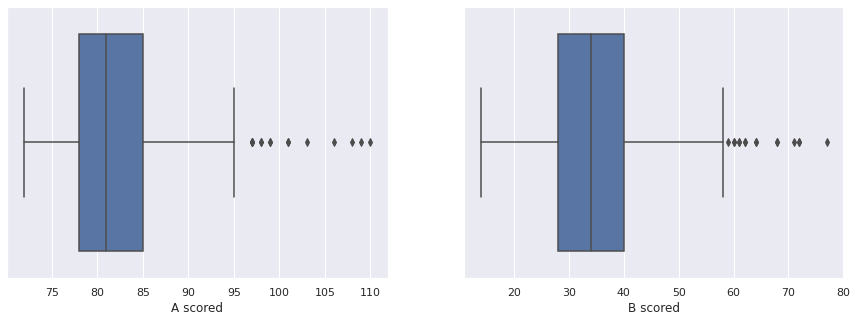

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=tennis_df['A scored'], ax=ax[0]);
sns.boxplot(x=tennis_df['B scored'], ax=ax[1]);

In [9]:
def percentage(df: pd.DataFrame, column_a: str, column_b: str):
    data_a = df.loc[:, column_a].sum()
    data_b = df.loc[:, column_b].sum()
    return (data_a) / (data_a + data_b)

percentages = {}
percentages['scored'] = {'A': percentage(tennis_df, 'A scored', 'B scored'), 'B': percentage(tennis_df, 'B scored', 'A scored')}
percentages['sets'] = {'A': percentage(tennis_df, 'sets A-Wins', 'sets B-Wins'), 'B': percentage(tennis_df, 'B scored', 'A scored')}
percentages['games'] = {'A': percentage(tennis_df, 'games A-Wins', 'games B-Wins'), 'B': percentage(tennis_df, 'games B-Wins', 'games A-Wins')}

percentages_df = pd.DataFrame(percentages)
percentages_df

,scored,sets,games
A,0.700235,1.000000,0.901698
B,0.299765,0.299765,0.098302


In [10]:
statistics = {}
statistics['scored_mean'] = {'A': tennis_df.loc[:, 'A scored'].mean(), 'B': tennis_df.loc[:, 'A scored'].mean()}
statistics['scored_std'] = {'A': tennis_df.loc[:, 'A scored'].std(), 'B': tennis_df.loc[:, 'A scored'].std()}
statistics['sets_mean'] = {'A': tennis_df.loc[:, 'sets A-Wins'].mean(), 'B': tennis_df.loc[:, 'sets A-Wins'].mean()}
statistics['sets_std'] = {'A': tennis_df.loc[:, 'sets A-Wins'].std(), 'B': tennis_df.loc[:, 'sets A-Wins'].std()}
statistics['games_mean'] = {'A': tennis_df.loc[:, 'games A-Wins'].mean(), 'B': tennis_df.loc[:, 'games A-Wins'].mean()}
statistics['games_std'] = {'A': tennis_df.loc[:, 'games A-Wins'].std(), 'B': tennis_df.loc[:, 'games A-Wins'].std()}

statistics_df = pd.DataFrame(statistics)
statistics_df

,scored_mean,scored_std,sets_mean,sets_std,games_mean,games_std
A,81.772,5.335399,3.0,0.0,18.006,0.077266
B,81.772,5.335399,3.0,0.0,18.006,0.077266


## Análise para p semelhante

In [11]:
#
n_sample = 1000
probability = 0.52

tennis_df = TenisSimulation.generate_dataset(probability, n_sample)
tennis_df.to_parquet(f'{n_sample}_probability_{probability}.parquet.gzip')

100%|██████████| 1000/1000 [00:00<00:00, 1431.41it/s]


## Vários P

In [143]:
%%capture
def percentage(df: pd.DataFrame, column_a: str, column_b: str):
    data_a = df.loc[:, column_a].sum()
    data_b = df.loc[:, column_b].sum()
    return (data_a) / (data_a + data_b)

p_values = pd.DataFrame([])

for i in range(0, 1001):
    n_sample = 100
    p = i * 0.0009 + 0.1
    tennis_df = TenisSimulation.generate_dataset(p, n_sample)

    percentages = {}
    percentages['p'] = p
    percentages['games'] = {'A': percentage(tennis_df, 'games A-Wins', 'games B-Wins')}
    percentages['sets'] = {'A': percentage(tennis_df, 'sets A-Wins', 'sets B-Wins')}
    percentages['match'] = {'A': tennis_df[tennis_df['Winner'] == 'A'].shape[0] / tennis_df.shape[0]}

    percentages_df = pd.DataFrame(percentages)
    p_values = pd.concat([p_values, percentages_df])

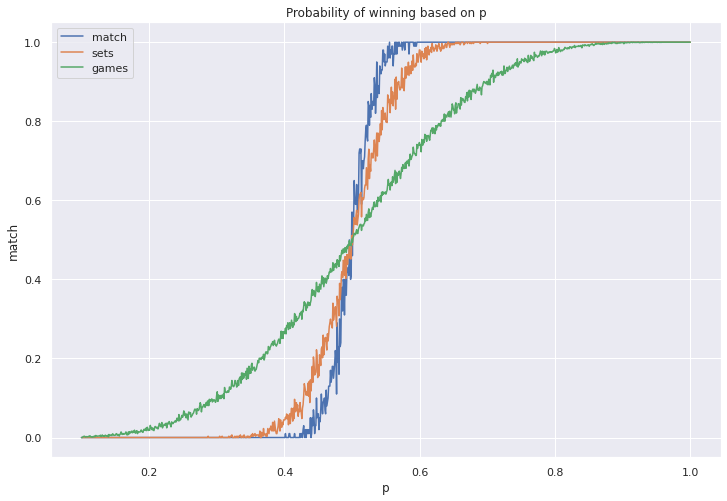

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Probability of winning based on p')
sns.lineplot(data=p_values.copy().reset_index(), x='p', y='match', ax=ax, label='match');
sns.lineplot(data=p_values.copy().reset_index(), x='p', y='sets', ax=ax, label='sets');
sns.lineplot(data=p_values.copy().reset_index(), x='p', y='games', ax=ax, label='games');